In [1]:
import scanpy as sc
import pickle
import pandas as pd
import matplotlib.pyplot as plt

2023-08-10 17:33:06.311536: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.


In [3]:
#read in SATURN results, perform PCA, neighbors, UMAP computation
adata = sc.read("/home/apennacchio/pcsct/saturn/out/14/test256_data_sbicolor_root10_integrated_zmays23_org_saturn_seed_0.h5ad")
sc.pp.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)


/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


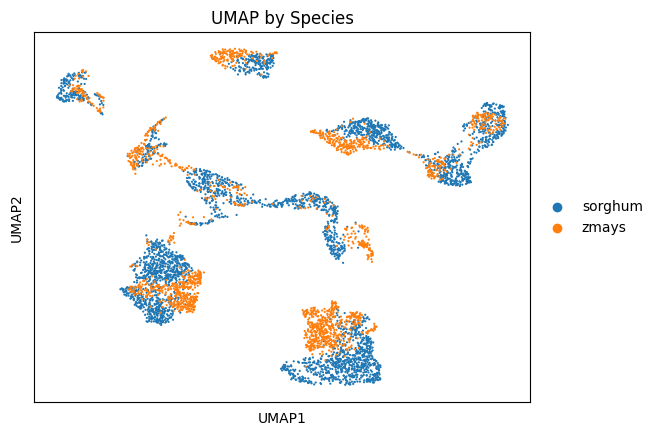

/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


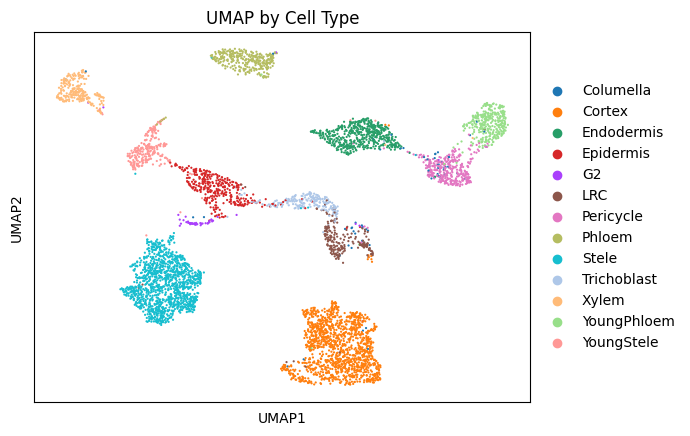

/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


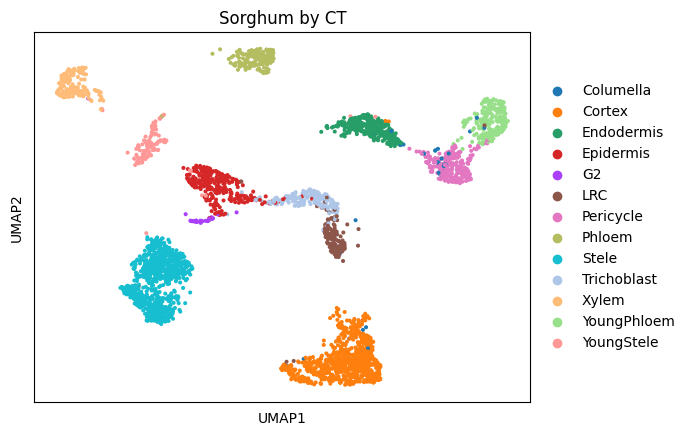

/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


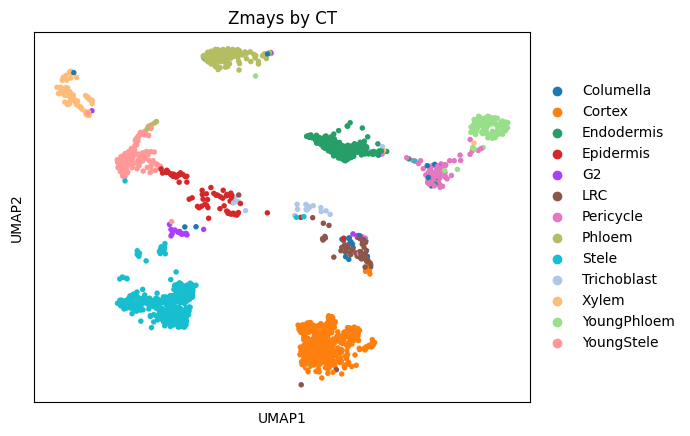

In [7]:
#generate various UMAPs, can color by "species", "labels2" (column used to guide SATURN integration, leiden or CT), or "ref_labels" (usually going to be CT labels)
sc.pl.umap(adata, color="species", title="UMAP by Species", size=10)
sc.pl.umap(adata, color="labels2", title="UMAP by Cell Type", size=10)
sdata = adata[adata.obs['species'] == 'sorghum']
sc.pl.umap(sdata, color="labels2", title="Sorghum by CT")
zdata = adata[adata.obs['species'] == 'zmays']
sc.pl.umap(zdata, color="labels2", title="Zmays by CT")


In [8]:
#load in macrogene info into macrogene_adata
with open("/home/apennacchio/pcsct/saturn/out/14/test256_data_sbicolor_root10_integrated_zmays23_org_saturn_seed_0_genes_to_macrogenes.pkl", "rb") as f:
    macrogene_weights = pickle.load(f)
    
macrogene_adata = sc.AnnData(adata.obsm["macrogenes"])
macrogene_adata.obs = adata.obs

categories: Columella, Cortex, Endodermis, etc.
var_group_labels: Xylem


/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


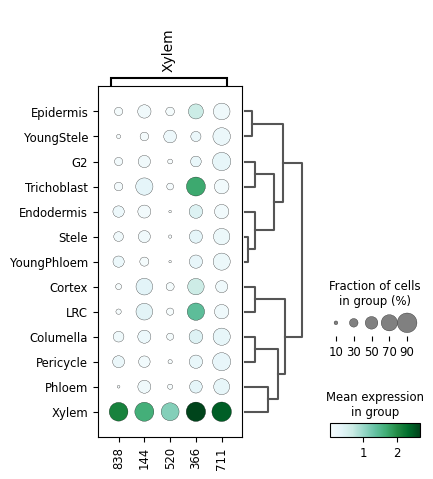

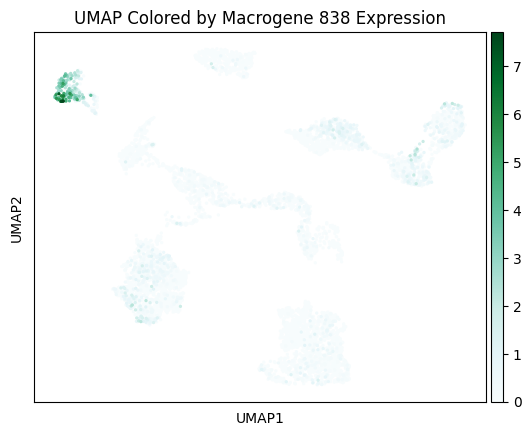

In [13]:
#perform differential expression analysis on CT of choice
label= "Xylem"
sc.tl.rank_genes_groups(macrogene_adata, groupby="labels2", groups=[label], method="wilcoxon")
sc.pl.rank_genes_groups_dotplot(macrogene_adata, cmap='BuGn', n_genes=5)

#visualize macrogene 838 (top DE macrogene in xylem) expression in UMAP space
mac = adata.obsm['macrogenes'][:, 838]
adata.obs['mac'] = mac
sc.pl.umap(adata, color='mac', cmap='BuGn', title='UMAP Colored by Macrogene 838 Expression')

In [15]:
#helper function to visualize gene contribution to macrogene
def get_scores(macrogene):
    '''
    Given the index of a macrogene, return the scores by gene for that centroid
    '''
    scores = {}
    for (gene), score in macrogene_weights.items():
        scores[gene] = score[int(macrogene)]
    return scores 

#find top 5 differentially expressed macrogenes in Xylem
xylem_df = sc.get.rank_genes_groups_df(macrogene_adata, group="Xylem").head(5)

#look at gene contributions for each macrogene
for macrogene in xylem_df["names"]:
    print(f"Macrogene {macrogene}")
    display(pd.DataFrame(get_scores(macrogene).items(), columns=["gene", "weight"])\
            .sort_values("weight", ascending=False)\
            .head(12))

Macrogene 838


,gene,weight
9195,zmays_Zm00001eb062390,1.100113
88,sorghum_SORBI_3001G038300,1.079295
12167,zmays_Zm00001eb195030,0.970614
9261,zmays_Zm00001eb404880,0.954887
1040,sorghum_SORBI_3001G406700,0.952180
5193,sorghum_SORBI_3005G004800,0.951591
8603,zmays_Zm00001eb030720,0.938674
1004,sorghum_SORBI_3001G395700,0.934333
12121,zmays_Zm00001eb193280,0.934238
10979,zmays_Zm00001eb130530,0.933986


Macrogene 144


,gene,weight
15439,zmays_Zm00001eb374470,1.053128
1586,sorghum_SORBI_3010G067500,1.002510
692,sorghum_SORBI_3001G280000,0.925751
9572,zmays_Zm00001eb423440,0.915876
10196,zmays_Zm00001eb084910,0.910976
8391,zmays_Zm00001eb018730,0.910544
11718,zmays_Zm00001eb168520,0.910505
10286,zmays_Zm00001eb090850,0.908613
13726,zmays_Zm00001eb284520,0.906789
10608,zmays_Zm00001eb110640,0.906104


Macrogene 520


,gene,weight
6425,sorghum_SORBI_3007G003000,1.060833
5038,sorghum_SORBI_3004G302400,0.944805
797,sorghum_SORBI_3001G316800,0.943331
11854,zmays_Zm00001eb176840,0.929368
6078,sorghum_SORBI_3006G160900,0.902206
1438,sorghum_SORBI_3010G002900,0.893012
10146,zmays_Zm00001eb082040,0.889204
10009,zmays_Zm00001eb075510,0.868123
13471,zmays_Zm00001eb269810,0.858824
11983,zmays_Zm00001eb186010,0.857130


Macrogene 366


,gene,weight
6328,sorghum_SORBI_3006G242000,1.145280
13428,zmays_Zm00001eb267050,1.118763
7358,sorghum_SORBI_3009G008800,1.028650
10366,zmays_Zm00001eb096480,0.876027
2353,sorghum_SORBI_3002G130700,0.857071
142,sorghum_SORBI_3001G058800,0.851409
9803,zmays_Zm00001eb066830,0.836858
2014,sorghum_SORBI_3010G239300,0.827805
2790,sorghum_SORBI_3002G302300,0.825860
4279,sorghum_SORBI_3003G443200,0.822119


Macrogene 711


,gene,weight
15518,zmays_Zm00001eb379070,1.114239
11397,zmays_Zm00001eb153340,0.912136
535,sorghum_SORBI_3001G224300,0.901198
2528,sorghum_SORBI_3002G205500,0.892364
8896,zmays_Zm00001eb046440,0.883194
14255,zmays_Zm00001eb313250,0.873809
106,sorghum_SORBI_3001G045700,0.863725
3849,sorghum_SORBI_3003G296400,0.853206
5696,sorghum_SORBI_3006G012900,0.369638
8929,zmays_Zm00001eb048160,0.297149


/opt/conda/lib/python3.10/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


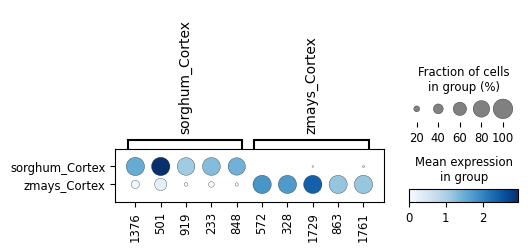

/var/tmp/ipykernel_8101/2641577305.py:11: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_cortex.obs['m'] = m


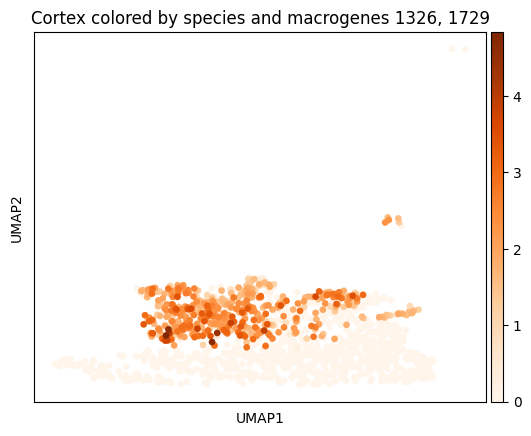

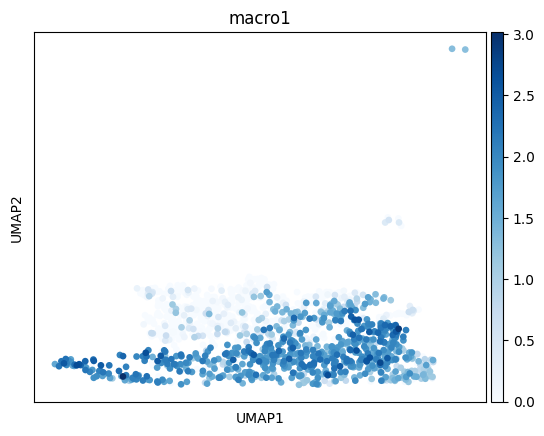

/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


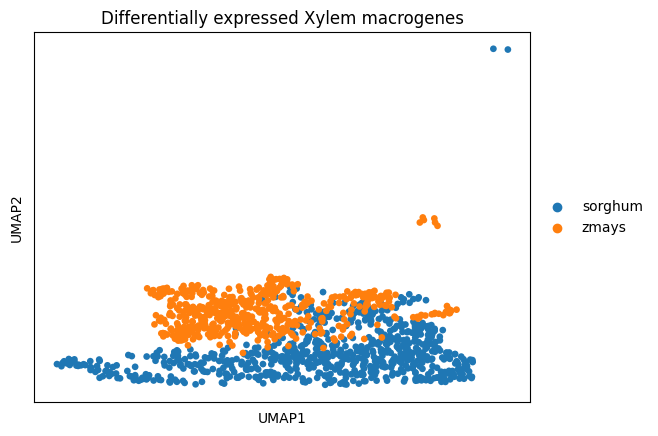

In [18]:
#look at top differentially expressed macrogenes in cortex by species
sp = macrogene_adata[macrogene_adata.obs["labels2"] == "Cortex"]

#differential expression + dotplot
sc.tl.rank_genes_groups(sp, groupby="labels", groups=["sorghum_Cortex", "zmays_Cortex"], method="wilcoxon")
sc.pl.rank_genes_groups_dotplot(sp, cmap='Blues', n_genes=5)

#extract expression data for top DE macrogenes in cortex by species (572, 1376)
adata_cortex = adata[adata.obs['labels2'] == 'Cortex']
m = adata_cortex.obsm['macrogenes'][:, 1]
adata_cortex.obs['m'] = m
macro = adata_cortex.obsm['macrogenes'][:, 572]
adata_cortex.obs['macro'] = macro
macro1 = adata_cortex.obsm['macrogenes'][:, 1376]
adata_cortex.obs['macro1'] = macro1

#visualize macrogene expression of 572, 1376 in UMAP space
sc.pl.umap(adata_cortex, color=['macro'], cmap='Oranges', title='Cortex colored by species and macrogenes 1326, 1729')
sc.pl.umap(adata_cortex, color=['macro1'], cmap='Blues')
sc.pl.umap(adata_cortex, color='species', title='Differentially expressed Xylem macrogenes')